# mplstyle and DRY for storytelling in matplotlib

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import duckdb

#om jag kör detta i Python script måste jag använda pathlib. 
#Path(__file__).parent / "styles.mplstyle"
#Men nu i notebook kan man gå raka vägen.
plt.style.use("styles/base.mplstyle")

df = pd.read_csv("data/jobs_in_data_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [18]:
df.shape

(14199, 12)

In [19]:
df_job_categories = df["job_category"].value_counts()
df_job_categories

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

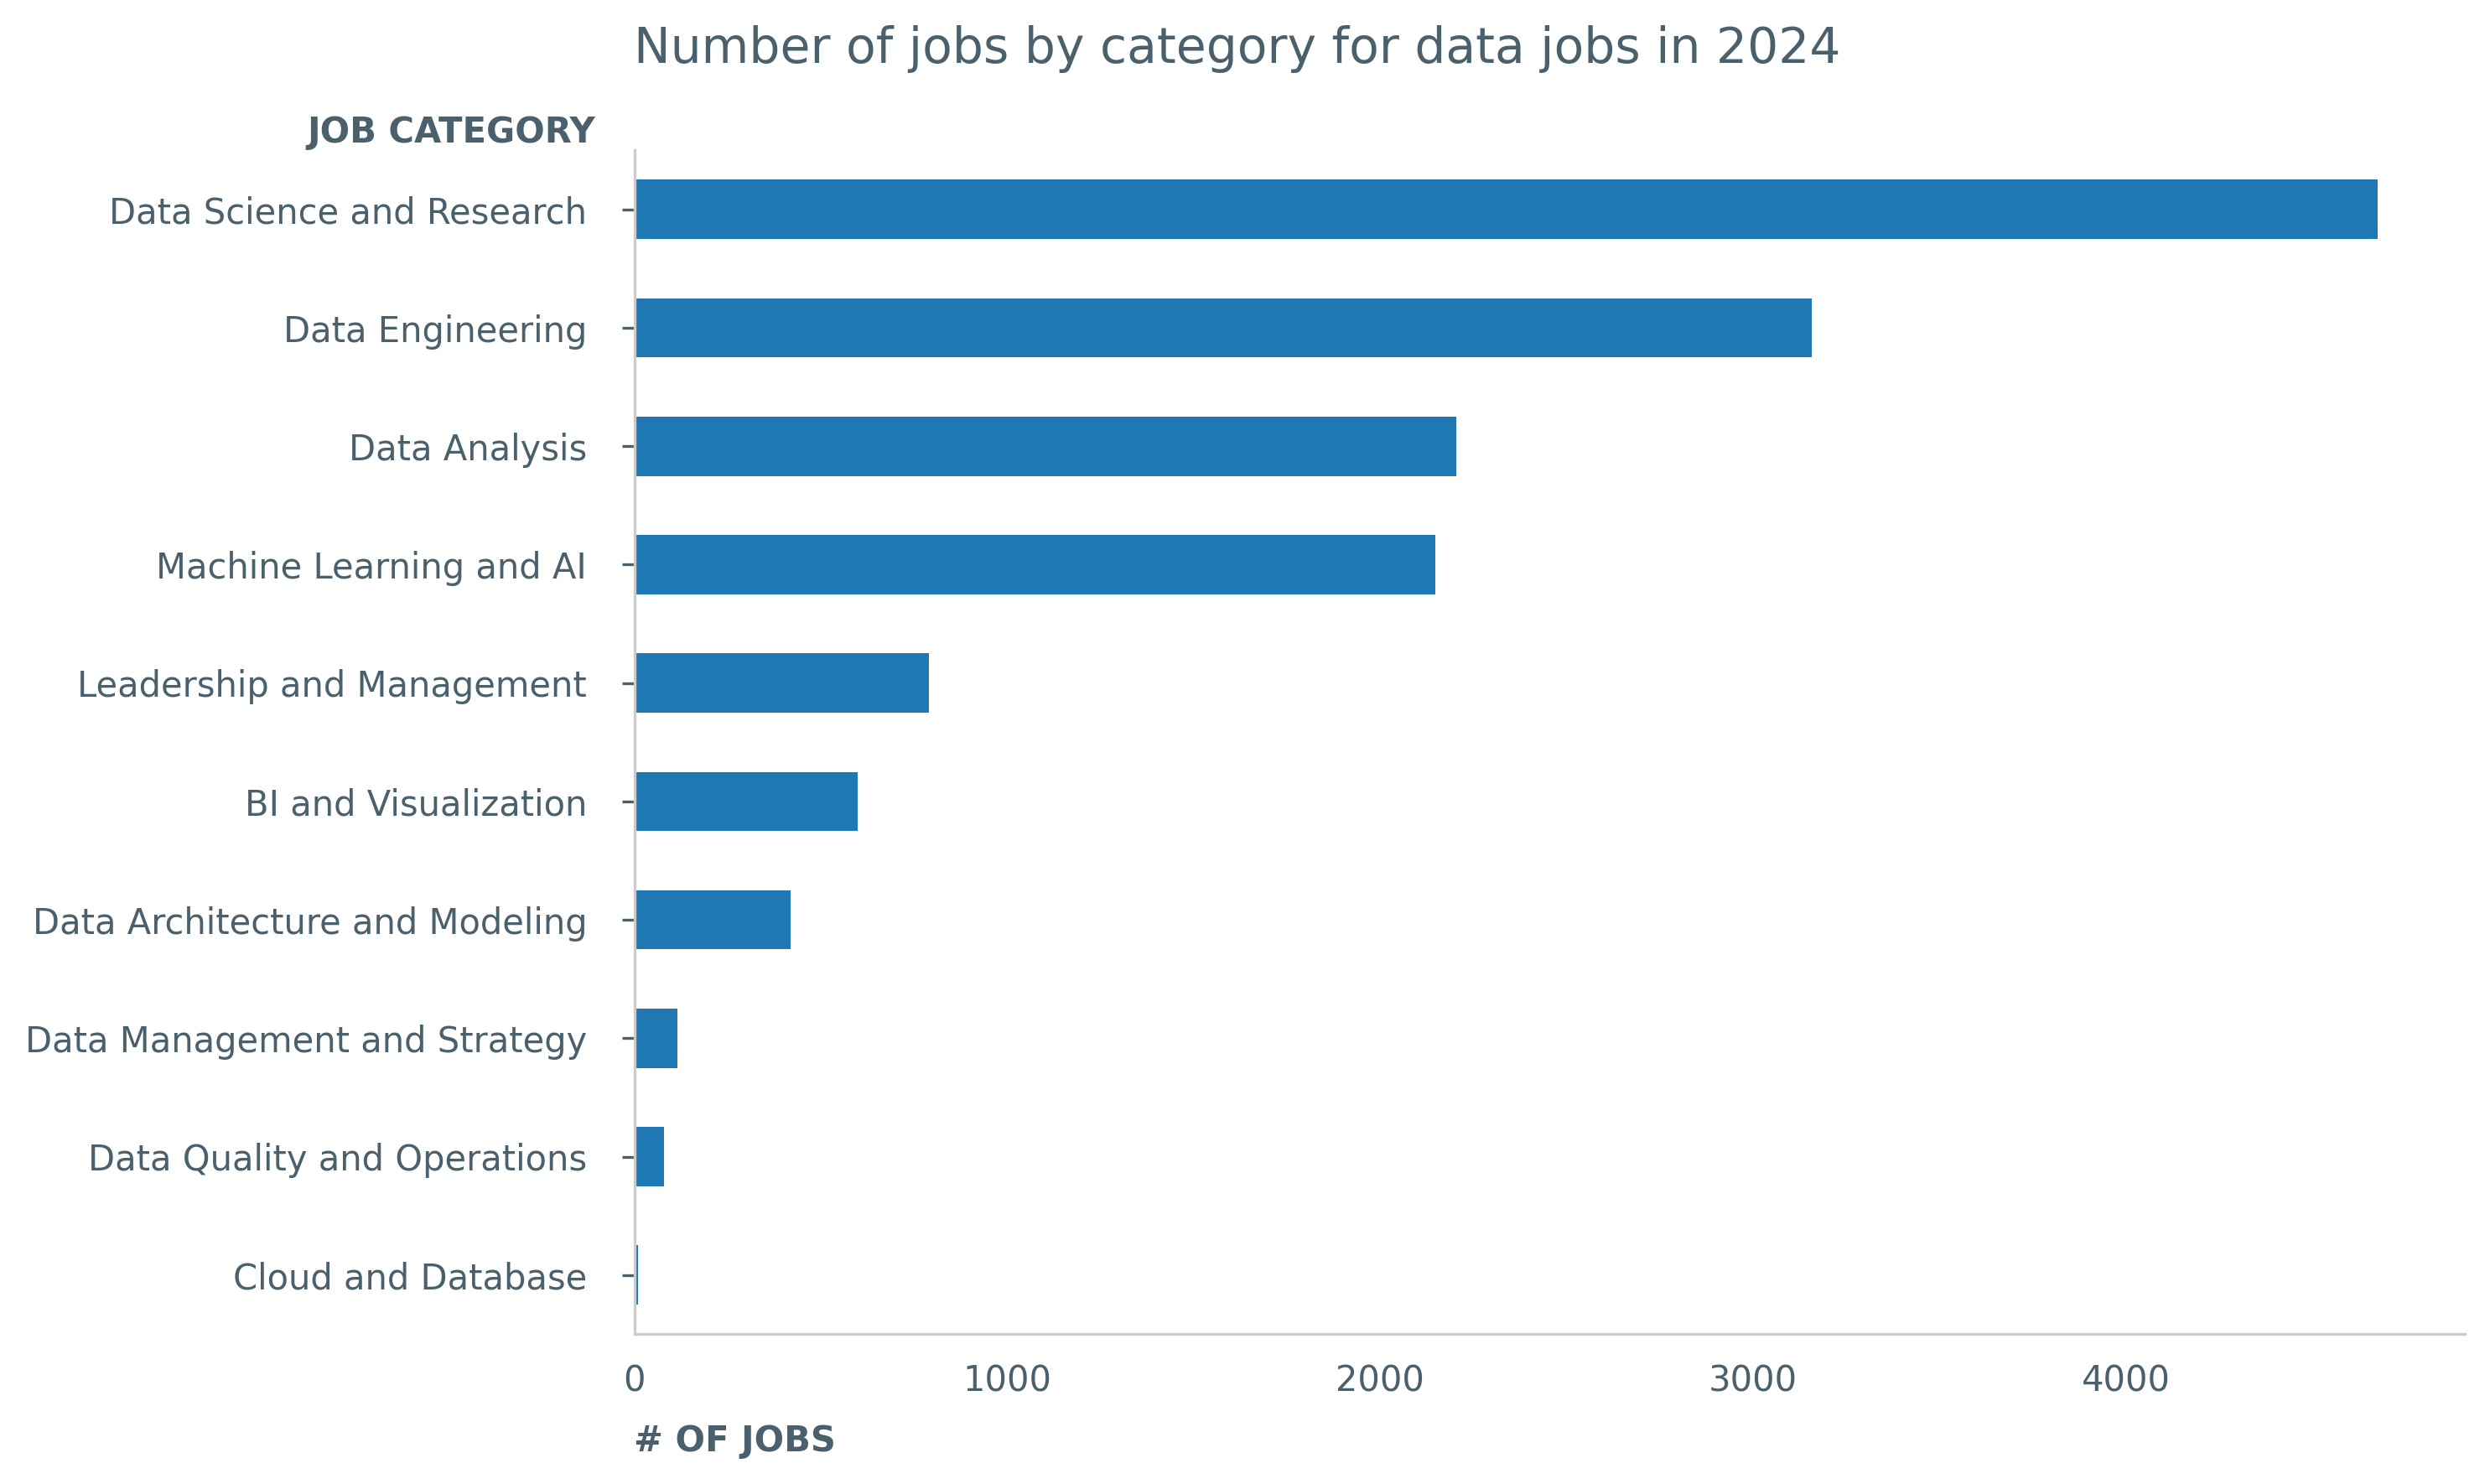

In [20]:
from chart_utils import horizontal_bar_option, save_fig_from_ax
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1
    
ax = df_job_categories.plot(kind="barh")

horizontal_bar_option(
    ax, 
    title="Number of jobs by category for data jobs in 2024",
    xlabel="# OF JOBS")

save_fig_from_ax(ax, "figures/number_data_jobs3.png")

In [21]:
df_salary = (
    duckdb.query(
        """
    SELECT 
        job_category, 
        CAST(AVG(salary_in_usd) AS INT) AS avg_salary_usd
    FROM 
        df
    GROUP BY 
        job_category
    ORDER BY avg_salary_usd DESC             
"""
    )
    .df()
    .set_index("job_category")
)

df_salary

,avg_salary_usd
job_category,
Machine Learning and AI,181873
Data Science and Research,162471
Data Architecture and Modeling,156159
Data Engineering,146720
Cloud and Database,142818
Leadership and Management,142644
BI and Visualization,125803
Data Analysis,106742
Data Quality and Operations,96294


In [22]:
from chart_utils import thousand_formatter
colors = [GRAY_1] * len(df_salary)
colors[3]= BLUE_1

#important to use a pd.Series for colors to work
ax = df_salary["avg_salary_usd"].plot(kind="barh", color=colors)

ax = horizontal_bar_option(
    ax,
    xlabel= "YEARLY",
    ylabel = "Job",
    title=r"$\bf{Data\ engineers}$"
    + " is both an extremely interesting field and also \none that tops the salary",
)

ax = thousand_formatter(ax, axis="x")

ImportError: cannot import name 'thousand_formatter' from 'chart_utils' (/Users/john.sandsjo/Documents/github/data-visualisation-john-sandsjo-de24/codealongs/05_mplstyle/chart_utils.py)